# TP noté : Inégalités salariales en France


Je vous fournis deux jeux de données :


- Le premier jeu de données est "fait à la main", car trouver un jeu de données libre de droit concernant les salaires en France est assez compliqué.

Il est stocké à l'adresse suivante:
https://raw.githubusercontent.com/llesoil/modelisation_des_problemes_scientifiques-/master/ressources/salaire.csv

Pour le construire et vérifier qu'il correspond approximativement à une sous-population cohérente des salariés français, j'ai utilisé des statistiques agrégées collectées par l'INSEE. Cependant, il peut rester quelques incohérences dans le jeu de données. Comme vous êtes chargé d'étudier ce jeu de données, c'est également vous qui devez détecter ces anomalies.

### (Bonus) N'hésitez pas à laisser des commentaires sur tout ce qui vous parait "suspect" dans la première base de données.

J'appelle suspect toute valeur anormalement éloignée d'une réalité possible. Exemple: si j'ai des données sur la fécondité, une mère de famille qui a plus de 40 enfants.

Concernant les différentes variables:
    - CSP définit la catégorie socio-professionelle des salariés
    - Sexe vaut Homme si l'individu est un homme, Femme si c'est une femme
    - Salaire est le salaire mensuel brut en euros
    - Age est l'age des individus




- Le second jeu de données est un tableau qui vient directement de ce [site](https://www.journaldunet.fr/patrimoine/guide-des-finances-personnelles/1166094-salaire-moyen/).

La source des données est également l'INSEE. Il est disponible à l'adresse suivante:

https://raw.githubusercontent.com/llesoil/modelisation_des_problemes_scientifiques-/master/ressources/evolution_salaire.csv



## 1) Importez les librairies numpy, pandas, matplotlib et toutes celles qui vous paraitront pertinentes à utiliser dans ce notebook. Importez le premier jeu de données, et affichez les cinq premières lignes. Quelles sont les variables qualitatives? Quelles sont les variables quantitatives?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import mca


salaire = pd.read_table(filepath_or_buffer = "https://raw.githubusercontent.com/llesoil/modelisation_des_problemes_scientifiques-/master/ressources/salaire.csv",
                        header = 0,
                        delimiter =',',
                        index_col=0)
salaire.head()

,CSP,Sexe,Salaire,Age
1,Cadre,Femme,1389.390011,29
2,Cadre,Femme,1481.224675,26
3,Cadre,Femme,2008.594558,19
4,Cadre,Femme,2216.098418,30
5,Cadre,Femme,2341.605914,23


Les variables qualitatives sont CSP et Sexe. Les variables quantitatives sont Salaire et Age.

## 2) a-] Quel est le salaire médian? Quel est le salaire moyen? Comparez les deux chiffres.

In [2]:
print( "Le salaire médian est de", round(np.percentile(salaire['Salaire'],50)), "euros.")

Le salaire médian est de 2510.0 euros.


In [3]:
print( "Le salaire moyen est de", round(np.mean(salaire['Salaire'])), "euros.")

Le salaire moyen est de 3052.0 euros.


Le salaire médian est inférieur au salaire moyen, ce qui signifie qu'il a quelques gros salaires qui font monter la moyenne.

## 2) b-] Combien de personnes sont agées de plus de 35 ans dans la base de données?

In [4]:
age = salaire['Age']
len(age.iloc[np.where(age>35)])

6444

## 2) c-] Au sein de quelle catégorie socio-professionelle peut-on observer les plus grandes variations de salaires?

In [5]:
salaire.groupby('CSP').std()['Salaire']

CSP
Cadre                       1171.773948
Employe                      196.570055
Ouvrier                      397.625061
Profession intermediaire     481.915820
Name: Salaire, dtype: float64

Ce sont les cadres, avec une variation d'environ 1172 euros.

## 3) On considère que ce sont des salariés du privé. Pour passer du brut au net, il retrancher 23% de la valeur du brut. Créez une variable correspondant au salaire net, et affichez les premières lignes de la table.

In [6]:
salaire["Net"] = 0.77*salaire["Salaire"]
salaire.head()

,CSP,Sexe,Salaire,Age,Net
1,Cadre,Femme,1389.390011,29,1069.830308
2,Cadre,Femme,1481.224675,26,1140.543000
3,Cadre,Femme,2008.594558,19,1546.617810
4,Cadre,Femme,2216.098418,30,1706.395782
5,Cadre,Femme,2341.605914,23,1803.036553


## 4) a-] Représentez à l'aide d'un diagramme circulaire les proportions des différentes catégories socio-professionelles. Est-ce que les proportions vous paraissent correctes?

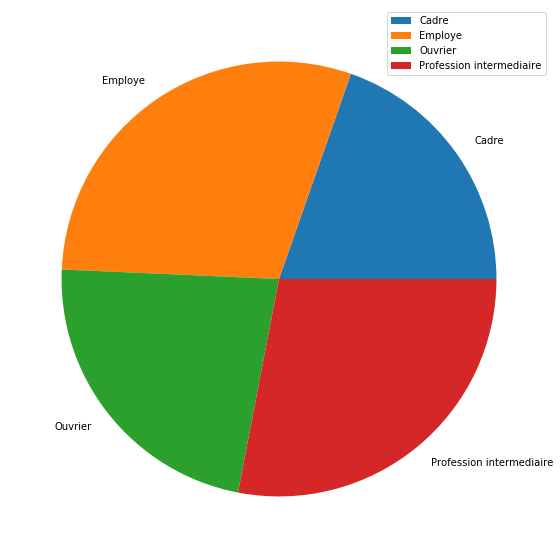

In [7]:
salaire.groupby("CSP").count().plot(y ='Net',kind='pie', figsize=(10,10))
plt.ylabel('')
plt.show()

## 4) b-] Représentez à l'aide d'un histogramme les effectifs par age.

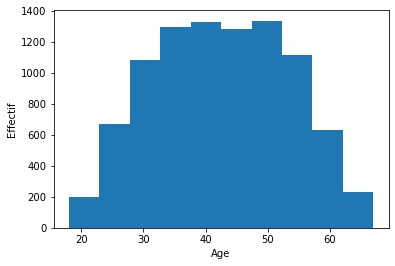

In [8]:
plt.hist(salaire['Age'])
plt.ylabel('Effectif')
plt.xlabel('Age')
plt.show()

## 5) Faites un tableau de contingence entre les variables Sexe et CSP. Dans quelle catégorie les femmes sont-elles le plus représentées? Même question pour les hommes.

In [9]:
pd.crosstab(salaire['CSP'],salaire['Sexe'])

Sexe,Femme,Homme
CSP,,
Cadre,720,1080
Employe,2040,680
Ouvrier,436,1643
Profession intermediaire,1362,1207


Les femmes sont plus souvent dans la csp "Employé". En revanche, elles laissent les métiers d'ouvriers aux hommes.

## 6) Faites un boxplot des salaires nets féminins/masculins. Calculez la différence de salaire médian.

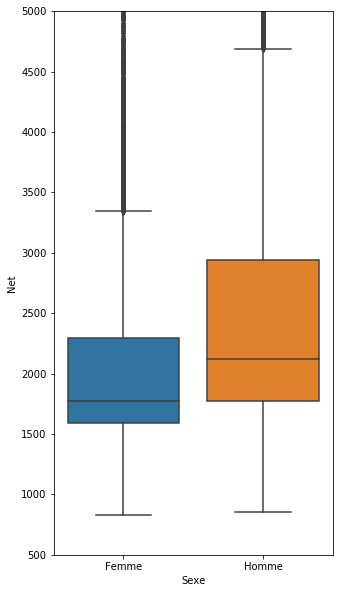

In [10]:
plt.figure(figsize=(5,10))
sns.boxplot(x='Sexe',y='Net',data=salaire)
plt.ylim(500,5000)
plt.show()

In [11]:
salaire.groupby("Sexe").median()

,Salaire,Age,Net
Sexe,,,
Femme,2299.745164,43,1770.803776
Homme,2755.952336,42,2122.083299


In [12]:
print("Le salaire net médian d'une femme est environ", 2122-1771,"euros inférieur à celui des hommes.")

Le salaire net médian d'une femme est environ 351 euros inférieur à celui des hommes.


## 7) a-] Isoler la catégorie socio-professionelle Employe dans un nouveau dataframe.

In [13]:
employe = salaire.iloc[np.where(salaire["CSP"]=="Employe")]
employe.head()

,CSP,Sexe,Salaire,Age,Net
1801,Employe,Femme,1508.211354,24,1161.322742
1802,Employe,Femme,1541.374915,23,1186.858684
1803,Employe,Femme,1598.025972,23,1230.479999
1804,Employe,Femme,1605.064169,28,1235.899410
1805,Employe,Femme,1610.551487,28,1240.124645


## 7) b-] Affichez un nuage de point représentant en ordonnées le salaire net des employés, et en abscisses l'age des employés.

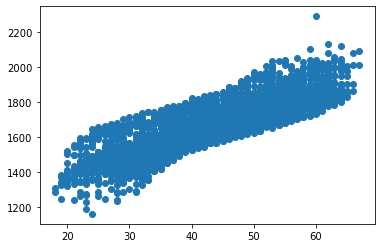

In [14]:
plt.scatter(employe['Age'],employe['Net'])
plt.show()

## 7) c-] Tracez la droite de régression correspondant au graphe précédent. Commentez la valeur du R², la régression vous parait-elle adaptée?

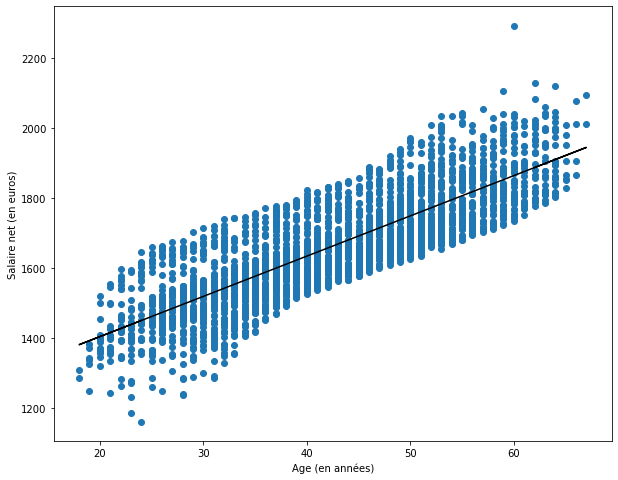

R² = 0.6882832792833659


In [15]:
y = employe['Net']
x = employe['Age']

coef, intercept, r_value, _ , std_err = linregress(x,y)
predictionNet = coef*x+intercept


plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x,predictionNet,color="black")
plt.ylabel("Salaire net (en euros)")
plt.xlabel("Age (en années)")
plt.show()

print("R² =",r_value**2)

La régression se justifie, le R² est de 0.7, donc plutôt proche de 1, avec l'expérience le salaire augmente naturellement.

## 7) d-] Je suis un employé moyen de 25 ans, peux-tu estimer mon salaire net? Même question 30 ans plus tard. Un employe senior gagne combien de fois le salaire d'un employé junior?

In [16]:
junior = round(coef*25+intercept)
print("Un employé junior gagne environ", junior, "euros.")
senior = round(coef*55+intercept)
print("Un employé senior gagne environ", senior, "euros.")
print("Un senior gagne donc",round(senior/junior,2),"salaire de junior.")

Un employé junior gagne environ 1461.0 euros.
Un employé senior gagne environ 1806.0 euros.
Un senior gagne donc 1.24 salaire de junior.


## 7) e-] Comment pourrait-on améliorer cette régression?

Pour s'inspirer, on pourra utiliser l'option hue de la fonction pairplot du module seaborn.

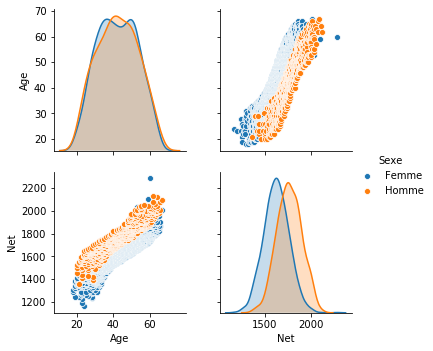

In [17]:
sns.pairplot(employe,
             vars = ['Age','Net'],
             hue = "Sexe")
plt.show()

On voit deux groupes apparaitre ; une idée que l'on peut avoir et de faire une régression pour les femmes, et une autre pour les hommes.

R² femme = 0.8151842538736539
R² homme = 0.8416472615047473


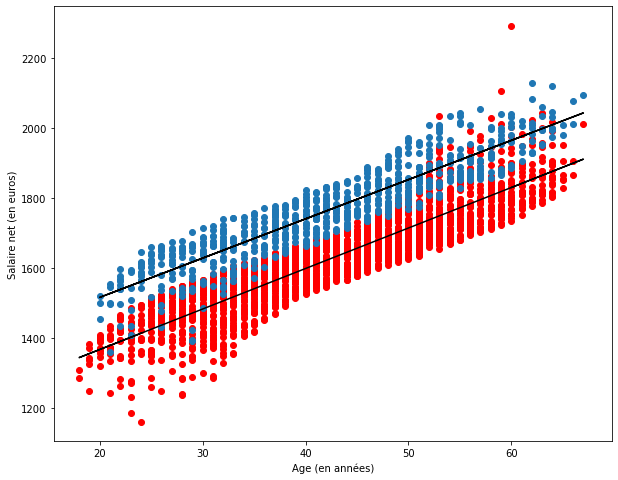

In [18]:
employeFemme = employe.iloc[np.where(employe["Sexe"] =="Femme")]
employeHomme = employe.iloc[np.where(employe["Sexe"] =="Homme")]

y = employeFemme['Net']
x = employeFemme['Age']

coef, intercept, r_value, _ , std_err = linregress(x,y)
predictionNet = coef*x+intercept


plt.figure(figsize=(10,8))
plt.scatter(x,y, color ="red")
plt.plot(x,predictionNet,color="black")
plt.ylabel("Salaire net (en euros)")
plt.xlabel("Age (en années)")

print("R² femme =",r_value**2)

y = employeHomme['Net']
x = employeHomme['Age']

coef, intercept, r_value, _ , std_err = linregress(x,y)
predictionNet = coef*x+intercept


plt.scatter(x,y)
plt.plot(x,predictionNet,color="black")
plt.ylabel("Salaire net (en euros)")
plt.xlabel("Age (en années)")

print("R² homme =",r_value**2)

plt.show()



On a augmenté le R² de plus de 0.1 grâce à cette méthode!

## 8) a-] Créez des variables qualitatives à partir du salaire net et de l'age. On pourra faire trois classes de valeur pour chaque.

In [19]:
def Quali(nom):
    expres = salaire[nom]
    borne1, borne2 = np.percentile(expres,33), np.percentile(expres,66)
    return np.array(['Faible'*int(k<=borne1) + 'Moyen'*int(k>borne1 and k <borne2) + 'Haut'*int(k>=borne2) for k in expres])

salaire['salaireQuali']=Quali('Salaire')
salaire['ageQuali']=Quali('Age')

## 8) b-] Créez le tableau disjonctif complet relatif aux deux variables de la question 8) a-], au Sexe, et à la CSP

In [20]:
res = pd.get_dummies(salaire[['salaireQuali','ageQuali','Sexe','CSP']])
res.head()

,salaireQuali_Faible,salaireQuali_Haut,salaireQuali_Moyen,ageQuali_Faible,ageQuali_Haut,ageQuali_Moyen,Sexe_Femme,Sexe_Homme,CSP_Cadre,CSP_Employe,CSP_Ouvrier,CSP_Profession intermediaire
1,1,0,0,1,0,0,1,0,1,0,0,0
2,1,0,0,1,0,0,1,0,1,0,0,0
3,1,0,0,1,0,0,1,0,1,0,0,0
4,1,0,0,1,0,0,1,0,1,0,0,0
5,0,0,1,1,0,0,1,0,1,0,0,0


## 8) c-] Affichez le premier plan factoriel de l'ACM appliqué au tableau du 8) b-], et commentez les résultats. Qu'en déduisez-vous?

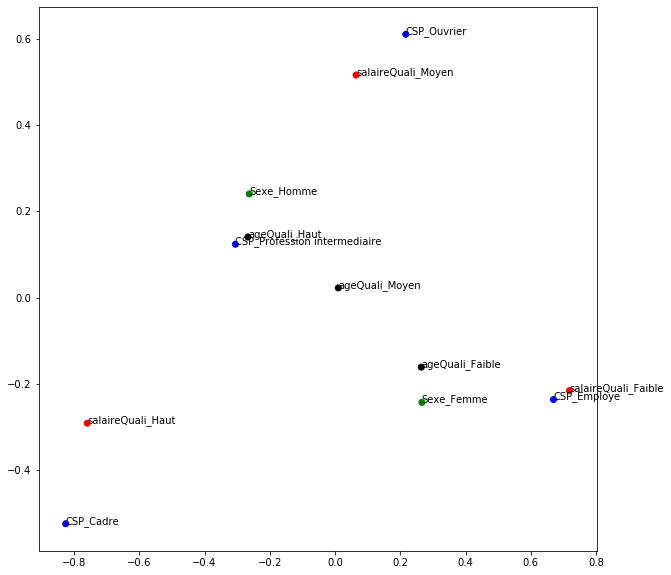

In [21]:
acm = mca.MCA(res)

plt.figure(figsize=(10,10))

couleurs = ['red']*3+['black']*3+['green']*2+['blue']*4
plt.scatter(acm.fs_c()[:, 0], acm.fs_c()[:, 1], color=couleurs)

nombreColonnes = len(res.columns)
for indiceVariable in range(nombreColonnes):
    plt.text(x= acm.fs_c()[:, 0][indiceVariable], y = acm.fs_c()[:, 1][indiceVariable], s = res.columns[indiceVariable])

plt.show()
#print("Le plan contient",round((acm.L[0]+acm.L[1])/acm.inertia*100),"% de l'information")

L'axe horizontal distingue les gros salaires, à gauche, des salaires plus modestes, à gauche.
En question 5), on avait vu que les femmes étaient particulièrement présentes dans la CSP employé, et peu dans la CSP ouvrier, ce qui se retrouve graphiquement.
La diagonale (bas-gauche -> haut-droit) oppose les cadres aux ouvriers, l'autre diagonale représentant la masse des salariés. Sur cette autre diagonale, on peut voir un gradient d'expérience. Avec l'age, les femmes finissent par tendre vers des salaires plus conséquents.

Concernant les groupes, tout dépend de leur nombre: en fixant trois groupes, on regrouperait plutôt:
- les cadres & salaires hauts
- les hommes ouvriers/employés/profession inter & salaire moyens d'age moyen
- les femmes, les jeunes, les salaires faibles et les employés

## 9) Importez la seconde base, et affichez l'évolution des salaires net moyens féminins, masculins et généraux de 1995 à 2014

In [22]:
evol = pd.read_table(filepath_or_buffer = "https://raw.githubusercontent.com/llesoil/modelisation_des_problemes_scientifiques-/master/ressources/evolution_salaire.csv",
                        header = 0,
                        delimiter =',',
                        index_col=0)

annee = np.array(evol.columns,dtype=int)
lab = evol.index
evol

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
ensemble,17928,18109,18439,18726,19115,19516,19970,20392,20822,21293,21900,22302,23009,23718,24033,24518,25126,25507,26059,26327
femme,15249,15346,15710,16032,16380,16715,17119,17495,17914,18345,18972,19362,19956,20580,20997,21464,22030,22424,22950,23280
homme,19516,19751,20071,20334,20752,21223,21722,22205,22651,23183,23794,24209,25011,25799,26082,26606,27238,27626,28216,28457


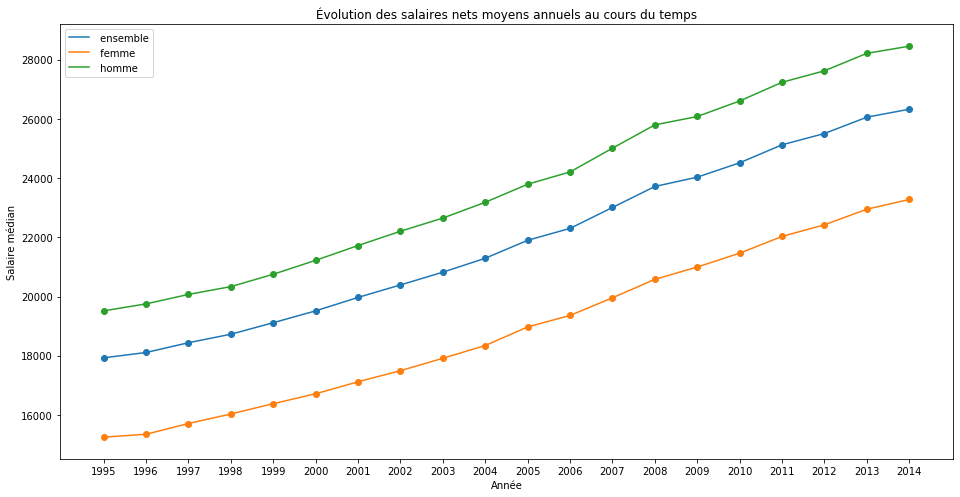

In [23]:
plt.figure(figsize=(16,8))

for i in range(3):
    tab = np.array(evol.iloc[i])
    plt.scatter(annee, tab)
    plt.plot(annee, tab)
plt.legend(lab)
plt.xticks(annee)
plt.ylabel("Salaire médian")
plt.xlabel("Année")
plt.title("Évolution des salaires nets moyens annuels au cours du temps")
plt.show()

## 10) D'après ce [site](http://mon-convertisseur.fr/calculateur-inflation-entre-deux-dates.php?A=100&C1=EUR&INDICE=FRCPI1998&DD1=01&MM1=01&YYYY1=1995&DD2=01&MM2=01&YYYY2=2014&btnOK=Calculer+%C3%A9quivalent), l'inflation pour l'euro (ou le franc avant 2002) entre 1995 et 2014 a progressé de 44%. A-t-on gagné ou perdu en pouvoir d'achat?

In [24]:
print("Pour les femmes : ",round((23280-15249)/15249*100,1),"% de progression")
print("Pour les hommes : ",round((28457-19516)/19516*100,1),"% de progression")
print("Dans l'ensemble : ",round((26327-17928)/17928*100,1),"% de progression")

Pour les femmes :  52.7 % de progression
Pour les hommes :  45.8 % de progression
Dans l'ensemble :  46.8 % de progression


On a gagné en pouvoir d'achat!

## (Bonus) Critique de la première base de données

In [25]:
salaire.head()

,CSP,Sexe,Salaire,Age,Net,salaireQuali,ageQuali
1,Cadre,Femme,1389.390011,29,1069.830308,Faible,Faible
2,Cadre,Femme,1481.224675,26,1140.543000,Faible,Faible
3,Cadre,Femme,2008.594558,19,1546.617810,Faible,Faible
4,Cadre,Femme,2216.098418,30,1706.395782,Faible,Faible
5,Cadre,Femme,2341.605914,23,1803.036553,Moyen,Faible


In [26]:
print("Le salaire minimum de la base vaut",
      np.min(salaire['Net']),
      " euros, alors que le SMIC est fixé à 1149 euros.")

Le salaire minimum de la base vaut 376.91597245996854  euros, alors que le SMIC est fixé à 1149 euros.
